In [31]:
# ! pip install --upgrade pip
# ! pip install --upgrade git+https://github.com/oda-hub/oda_api@request-list pandas
# ! pip install linked-data-latex


import oda_api.api
import oda_api.token
import oda_api.plot_tools
import requests
import logging
from matplotlib import pylab as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.time import Time
import pandas as pd
import numpy as np
from ddpaper.draftdata import DraftData

# https://gcn.gsfc.nasa.gov/gcn3/32634.gcn3

In [32]:
# #slightly more verbose
logging.getLogger().setLevel(logging.INFO)
# #all messages
#logging.getLogger().setLevel(logging.DEBUG)

logging.getLogger('oda_api').addHandler(logging.StreamHandler())

In [33]:
# 120711 https://www.aanda.org/articles/aa/pdf/2014/07/aa20872-12.pdf
# https://www.cosmos.esa.int/web/integral/schedule-information

In [34]:
from matplotlib import pylab as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.time import Time
import pandas as pd
import numpy as np

In [35]:
T0_isot = "2022-10-09T13:17:00"
T0_ijd = Time(T0_isot).mjd - 51544


In [36]:
src_coord = SkyCoord("19h 13m 03.43s", "+19d 46m 23.1s", unit=u.deg)
source_name = "GRB221009A"
src_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (288.26429167, 19.77308333)>

In [37]:
# set!
# focus_obs_name = "r2562"
# focus_obs_name = "r2560"
# focus_obs_name = "r2559"
# focus_obs_name = "r2558"
focus_obs_name = "total_3p"

obs_by_name = dict(
    total_3p=dict(
        obs_T1_isot = "2022-10-08T00:39:04",
        obs_T2_isot = "2022-10-23T08:02:00"
    ))

for r in 2558, 2559, 2560, 2561, 2562:
    t1, t2 = [Time(float(t)+51544, format='mjd').isot for t in requests.get(f'https://www.astro.unige.ch/mmoda/dispatch-data/gw/timesystem/api/v1.0/converttime/REVNUM/{r}/IJD').text.split()[1:]]
    obs_by_name[f'r{r}']=dict(
        obs_T1_isot = t1,
        obs_T2_isot = t2
    )

focus_obs = obs_by_name[focus_obs_name]

with DraftData() as dd:
    dd['obs'][focus_obs_name] = focus_obs


obs_draft_data = DraftData(focus_obs_name)

focus_obs


/home/savchenk/.local/lib/python3.8/site-packages/ddpaper/draftdata.py:20: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  self.data = yaml.load(


{'obs_T1_isot': '2022-10-08T00:39:04', 'obs_T2_isot': '2022-10-23T08:02:00'}

In [38]:
src_coord.transform_to('galactic')

<SkyCoord (Galactic): (l, b) in deg
    (52.95942238, 4.32250154)>

In [39]:
focus_obs

{'obs_T1_isot': '2022-10-08T00:39:04', 'obs_T2_isot': '2022-10-23T08:02:00'}

In [40]:
scw_dict = pd.DataFrame(requests.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/timesystem/api/v1.0/scwlist/nrt/{focus_obs['obs_T1_isot']}/{focus_obs['obs_T2_isot']}?"
             f"ra={src_coord.ra.deg}&dec={src_coord.dec.deg}&radius=10&return_columns=SWID,SW_TYPE,TELAPSE,TSTART,TSTOP").json())

scw_list = scw_dict['SWID'][scw_dict['SW_TYPE'].str.strip() == "POINTING"]

print("\n".join(scw_list))

with obs_draft_data as dd:
    dd['telapse_sum_s'] = np.sum(scw_dict.TELAPSE[scw_dict['SW_TYPE'].str.strip() == "POINTING"])    
    dd['tstart_ijd'] = np.min(scw_dict.TSTART[scw_dict['SW_TYPE'].str.strip() == "POINTING"])    
    dd['tstop_ijd'] = np.max(scw_dict.TSTOP[scw_dict['SW_TYPE'].str.strip() == "POINTING"])    
    dd['telapse_total_s'] = (dd['tstop_ijd'] - dd['tstart_ijd'])*24*3600
    
dd

255800700010
255800700020
255800710010
255800720010
255800730010
255800740010
255800750010
255800760010
255800770010
255800780010
255800790010
255800800010
255800810010
255800820010
255800820020
255900010010
255900020010
255900030010
255900040010
255900050010
255900060010
255900070010
255900080010
255900090010
255900100010
255900110010
255900120010
255900130010
255900140010
255900150010
255900160010
255900170010
255900180010
255900190010
255900200010
255900210010
255900220010
255900230010
255900240010
255900250010
255900260010
255900270010
255900280010
255900290010
255900300010
255900310010
255900310020
255900320010
255900330010
255900340010
255900350010
255900360010
256000290010
256000300010
256000310010
256000320010
256000330010
256000340010
256000350010
256000360010
256000370010
256000380010
256000390010
256000400010
256000410010
256000420010
256000430010
256000440010
256000450010
256000460010
256000470010
256000480010
256000490010
256000500010
256000510010
256000520010
256000530010

{'isgri': {'exposure_s': 177949.3308846276},
 'jemx1': {'exposure_s': 225973.983140565, 'snr': 22.080917358398438},
 'jemx2': {'exposure_s': 217203.327134475, 'snr': 21.826650619506836},
 'joint_fit': {'e1_keV': 3,
  'e2_keV': 80,
  'flux_ecs': 4.4263e-10,
  'flux_ecs_err_68p': (-2.113000000000001e-11, 2.437000000000004e-11),
  'slope': 2.15041,
  'slope_err_90p': (-0.0712388, 0.0841283)},
 'obs': {},
 'telapse_sum_s': 299168.1950621365,
 'telapse_total_s': 789482.5871762645,
 'tstart_ijd': 8318.60328288933,
 'tstop_ijd': 8327.7408128335}

In [41]:
disp = oda_api.api.DispatcherAPI()
# disp_collection = oda_api.api.DispatcherAPICollection(use_local_cache=True)
disp.use_local_cache = True
disp.wait = True

source_images = {}

pars = []

for i in ['isgri', 'jemx1', 'jemx2']:
    instrument = i[:-1] if i.startswith('jemx') else i
    product = instrument + "_image"
    jemx_num= int(i[-1]) if i.startswith('jemx') else 1
    E1_keV, E2_keV = (3, 30) if i.startswith('jemx') else (28, 80)
    

    source_images[i] = disp.get_product(
        instrument=instrument,
        product=product,
        E1_keV=E1_keV,
        E2_keV=E2_keV,
        jemx_num=jemx_num,
        integral_data_rights="all-private",
        scw_list=[s + ".000" for s in scw_list],
        token=oda_api.token.discover_token()
    #     src_coord
    )


found token in file in home your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1667045307,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}
found token in file in home your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1667045307,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}
INFO:oda_api.token:found token in file in home your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1667045307,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": 

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
Set MJD-OBS to 59862.602477 from DATE-OBS.
Set MJD-END to 59871.740012 from DATE-END'. [astropy.wcs.wcs]
Set MJD-OBS to 59862.602477 from DATE-OBS.
Set MJD-END to 59871.740012 from DATE-END'.
/home/savchenk/.local/lib/python3.8/site-packages/oda_api/plot_tools.py:93: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.
Invalid DATE-OBS format 'UTC_format'.
Invalid DATE-END format 'UTC_format''. [astropy.wcs.wcs]
Invalid DATE-OBS format 'UTC_format'.
Invalid DATE-END format 'UTC_format''.


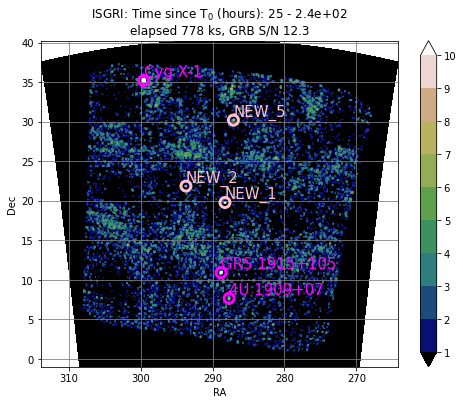

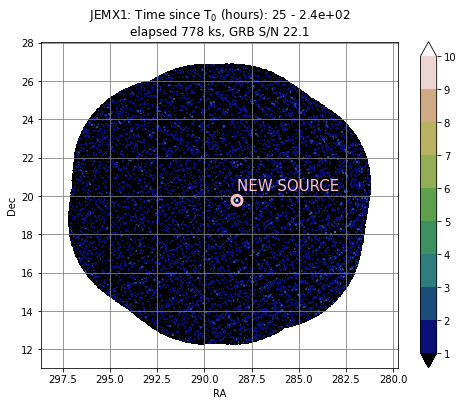

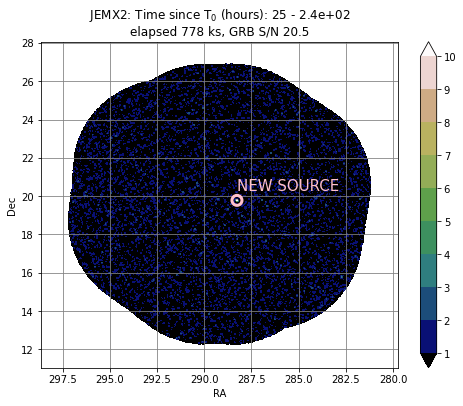

In [42]:
for name, image in source_images.items():
    if image:
        h = image.mosaic_image_0_mosaic.data_unit[4].header
        t = image.dispatcher_catalog_1.table        
        m = SkyCoord(t['ra'], t['dec']).separation(src_coord).arcmin <10

        try:
            snr = t[m]['significance'][0]
        except:
            snr = 0

        t = Time(h['TSTART'] + 51544, format='mjd').isot
        (im:=oda_api.plot_tools.OdaImage(image)).show(sliders=False)
        im.write_fits(f'{name}_{focus_obs_name}_')
        plt.title(f"{name.upper()}: Time since T$_0$ (hours): {(h['TSTART'] - T0_ijd)*24:.2g} - {(h['TSTOP'] - T0_ijd)*24:.2g}\n"
                  f"elapsed {int(h['TSTOP'] - h['TSTART'])*24*3.6:.3g} ks, GRB S/N {snr:.3g}")

In [43]:
# ! pip install pymosaic-fits
import mosaic
import importlib
importlib.reload(mosaic)
mosa = mosaic.FITsMosaic()

from astropy.io import fits

for ins in 'jemx1', 'jemx2': #, 'isgri':
    f = fits.open(f"{ins}_r2560_mosaic.fits")

    new_hdus = [fits.PrimaryHDU()]

    for i in f[2:-1]:

        for k, v in dict(i.header).items():
            if str(v).strip() == 'Real':
                print('patching', k)
                i.header[k] = 1000

        if i.header.get('IMATYPE', '') == 'RECONSTRUCTED':
            i.header['IMATYPE'] = 'INTENSITY'

        i.header['TELAPSE'] = 1000
        i.header['TFIRST'] = 0
        i.header['TLAST'] = 1000
        i.header['E_MIN'] = 3.04
        i.header['E_MAX'] = 29.84
        print(i.header.get('IMATYPE', '??'))
        new_hdus.append(i)
        
        
    fits.HDUList(new_hdus).writeto(f"{ins}_r2560_mosaic_mod.fits", overwrite=True)
    mosa.add(fits.open(f"{ins}_r2560_mosaic_mod.fits"))

mosa.writeto('jemxX_mosaic.fits')


INFO:root:first mosaic
INFO:root:adding mosaic


patching TELAPSE
INTENSITY
patching TELAPSE
VARIANCE
patching TELAPSE
SIGNIFICANCE
patching TELAPSE
EXPOSURE
patching TELAPSE
INTENSITY
patching TELAPSE
VARIANCE
patching TELAPSE
SIGNIFICANCE
patching TELAPSE
EXPOSURE


In [44]:
cat = source_images['isgri'].dispatcher_catalog_1

toremove = []
for i, r in enumerate(cat.table.iterrows()):
    print(r)
    if r[1].startswith('NEW_') or r[1].startswith('GRB') or r[1].startswith('SGR'):
        toremove.append(i)        

cat.table.add_row(
{
    'src_names': source_name,
    'ra': src_coord.ra.deg,
    'dec': src_coord.dec.deg,
    # 'ISGRI_FLAG': 1,
    'FLAG': 1,
    'ERR_RAD': 0.05,    
})

sgr = SkyCoord.from_name('SGR 1935+2154')
cat.table.add_row(
{
    'src_names': 'SGR 1935+2154',
    'ra': sgr.ra.deg,
    'dec': sgr.dec.deg,
    # 'ISGRI_FLAG': 1,
    'FLAG': 1,
    'ERR_RAD': 0.05,    
})


cat.table.remove_rows(toremove)

cat.table

(6, '4U 1909+07', 7.601008892059326, 287.69488525390625, 7.671874046325684, -32768, 1, 0, 0.006670000031590462)
(9, 'Cyg X-1', 173.6497039794922, 299.5948181152344, 35.20621109008789, -32768, 2, 0, 0.0002800000074785203)
(10, 'GRS 1915+105', 18.443647384643555, 288.8116760253906, 10.92329216003418, -32768, 2, 0, 0.0002800000074785203)
(81, 'NEW_1', 12.31788444519043, 288.2734680175781, 19.78383445739746, -32767, 0, 0, None)
(82, 'NEW_2', 9.223123550415039, 293.704833984375, 21.861047744750977, -32767, 0, 0, None)
(85, 'NEW_5', 7.817286491394043, 287.0945739746094, 30.20005989074707, -32767, 0, 0, None)


meta_ID,src_names,significance,ra,dec,NEW_SOURCE,ISGRI_FLAG,FLAG,ERR_RAD
,,,deg,deg,,,,
int64,str13,float64,float64,float64,int64,int64,int64,object
6,4U 1909+07,7.601008892059326,287.69488525390625,7.671874046325684,-32768,1,0,0.006670000031590462
9,Cyg X-1,173.6497039794922,299.5948181152344,35.20621109008789,-32768,2,0,0.0002800000074785203
10,GRS 1915+105,18.443647384643555,288.8116760253906,10.92329216003418,-32768,2,0,0.0002800000074785203
0,GRB221009A,0.0,288.26429166666657,19.773083333333332,0,0,1,0.05
0,SGR 1935+2154,0.0,293.732,21.896722,0,0,1,0.05


In [45]:
from astropy.table import Table

m_source = [not s.startswith('NEW') for s in cat.table['src_names']]
cat.table = Table(cat.table[m_source])

cat.get_api_dictionary()

'{"cat_frame": "fk5", "cat_coord_units": "deg", "cat_column_list": [[6, 9, 10, 0, 0], ["4U 1909+07", "Cyg X-1", "GRS 1915+105", "GRB221009A", "SGR 1935+2154"], [7.601008892059326, 173.6497039794922, 18.443647384643555, 0.0, 0.0], [287.69488525390625, 299.5948181152344, 288.8116760253906, 288.26429166666657, 293.732], [7.671874046325684, 35.20621109008789, 10.92329216003418, 19.773083333333332, 21.896722], [-32768, -32768, -32768, 0, 0], [1, 2, 2, 0, 0], [0, 0, 0, 1, 1], [0.006670000031590462, 0.0002800000074785203, 0.0002800000074785203, 0.05, 0.05]], "cat_column_names": ["meta_ID", "src_names", "significance", "ra", "dec", "NEW_SOURCE", "ISGRI_FLAG", "FLAG", "ERR_RAD"], "cat_column_descr": [["meta_ID", "<i8"], ["src_names", "<U13"], ["significance", "<f8"], ["ra", "<f8"], ["dec", "<f8"], ["NEW_SOURCE", "<i8"], ["ISGRI_FLAG", "<i8"], ["FLAG", "<i8"], ["ERR_RAD", "|O"]], "cat_lat_name": "dec", "cat_lon_name": "ra"}'

In [46]:

# from ddpaper.draftdata import DraftData

with obs_draft_data as dd:
    dd['obs'] = dict(
    )


/home/savchenk/.local/lib/python3.8/site-packages/ddpaper/draftdata.py:20: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarning)

In most other cases you should consider using 'safe_load(stream)'
  self.data = yaml.load(


In [47]:
source_products = {}

for product in [
        "isgri_lc",
        "isgri_spectrum",
        "isgri_image",
        "isgrihe_image",
        "jemx1_lc",
        "jemx1_spectrum",
        "jemx1_image",
        "jemx2_lc",
        "jemx2_spectrum",
        "jemx2_image",
    ]:
    disp.wait = False
    
    if 'jemx' in product:
        e1, e2 = 4, 30
    else:
        e1, e2 = 28, 80
    
    jnum = 1
    product_pass = product

    if 'jemx1' in product:
        jnum=1
        product_pass = product.replace("jemx1_", "jemx_")
    elif 'jemx2' in product:
        jnum=2
        product_pass = product.replace("jemx2_", "jemx_")
    elif 'isgrihe' in product:
        e1, e2 = 80, 200
        product_pass = product.replace("isgrihe_", "isgri_")
    
    source_products[product] = disp.get_product(
        instrument=product_pass.split("_")[0],
        product=product_pass,
        osa_version="OSA11.2",
        scw_list=[s+".000" for s in scw_list],
        token = oda_api.token.discover_token(),
        E1_keV=e1,
        E2_keV=e2,
        jemx_num=jnum,
        selected_catalog=cat.get_api_dictionary(),
        integral_data_rights="all-private",
    )

found token in file in home your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1667045307,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}
found token in file in home your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1667045307,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": "authenticated user, administrator, content manager, integral-private-qla, unige-hpc-full, public-pool-hpc, renku contributor, gallery contributor, job manager",
    "sub": "vladimir.savchenko+prod-test@gmail.com"
}
INFO:oda_api.token:found token in file in home your token payload: {
    "email": "vladimir.savchenko+prod-test@gmail.com",
    "exp": 1667045307,
    "name": "VolodymyrSavchenkoProdTest",
    "roles": 

In [48]:
source_products

{'isgri_lc': <oda_api.api.DataCollection at 0x7fe8f09a16d0>,
 'isgri_spectrum': <oda_api.api.DataCollection at 0x7fe8d09c4be0>,
 'isgri_image': <oda_api.api.DataCollection at 0x7fe8f019f220>,
 'isgrihe_image': <oda_api.api.DataCollection at 0x7fe8cec53250>,
 'jemx1_lc': <oda_api.api.DataCollection at 0x7fe8cd954be0>,
 'jemx1_spectrum': <oda_api.api.DataCollection at 0x7fe8f019f5b0>,
 'jemx1_image': <oda_api.api.DataCollection at 0x7fe8cd9408b0>,
 'jemx2_lc': <oda_api.api.DataCollection at 0x7fe8cd8b9730>,
 'jemx2_spectrum': <oda_api.api.DataCollection at 0x7fe8cd8f0c70>,
 'jemx2_image': <oda_api.api.DataCollection at 0x7fe8f0485340>}

In [49]:
d = source_products['isgrihe_image']
d.dispatcher_catalog_1.get_api_dictionary()

'{"cat_frame": "fk5", "cat_coord_units": "deg", "cat_column_list": [[1, 3, 4, 5, 10], ["Cyg X-1", "NEW_1", "NEW_2", "NEW_3", "NEW_8"], [45.55516052246094, 7.8420867919921875, 7.339420318603516, 7.340843677520752, 7.487318515777588], [299.59564208984375, 279.2430725097656, 276.4566650390625, 278.969482421875, 282.5522766113281], [35.19932174682617, 4.531042098999023, 6.836004734039307, 5.209732532501221, 20.5789794921875], [-32768, -32767, -32767, -32767, -32767], [2, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0.0, null, null, null, null]], "cat_column_names": ["meta_ID", "src_names", "significance", "ra", "dec", "NEW_SOURCE", "ISGRI_FLAG", "FLAG", "ERR_RAD"], "cat_column_descr": [["meta_ID", "<i8"], ["src_names", "<U7"], ["significance", "<f8"], ["ra", "<f8"], ["dec", "<f8"], ["NEW_SOURCE", "<i8"], ["ISGRI_FLAG", "<i8"], ["FLAG", "<i8"], ["ERR_RAD", "|O"]], "cat_lat_name": "dec", "cat_lon_name": "ra"}'

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.
Invalid DATE-OBS format 'UTC_format'.
Invalid DATE-END format 'UTC_format''. [astropy.wcs.wcs]
Invalid DATE-OBS format 'UTC_format'.
Invalid DATE-END format 'UTC_format''.
/home/savchenk/.local/lib/python3.8/site-packages/oda_api/plot_tools.py:93: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()
/home/savchenk/.local/lib/python3.8/site-packages/ddpaper/draftdata.py:20: UnsafeLoaderWarning: 
The default 'Loader' for 'load(stream)' without further arguments can be unsafe.
Use 'load(stream, Loader=ruamel.yaml.Loader)' explicitly if that is OK.
Alternatively include the following in your code:

  import warnings
  warnings.simplefilter('ignore', ruamel.yaml.error.UnsafeLoaderWarni

no GRB here!
no GRB here!


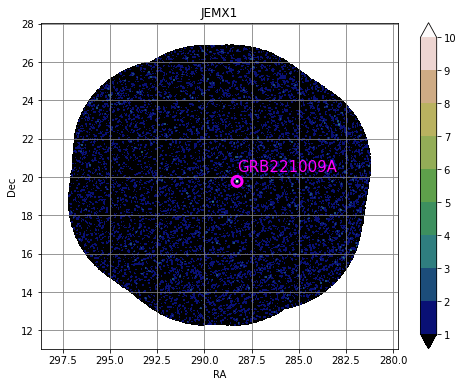

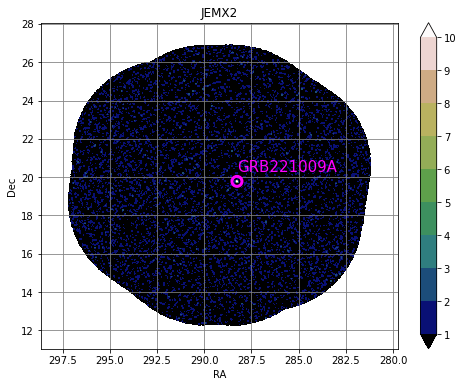

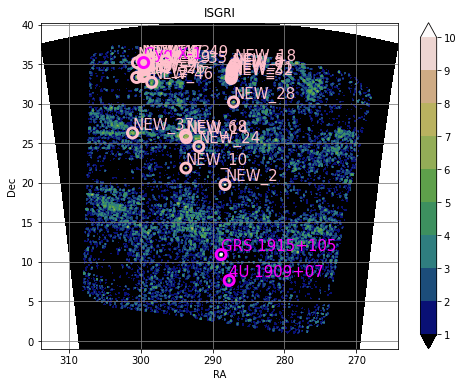

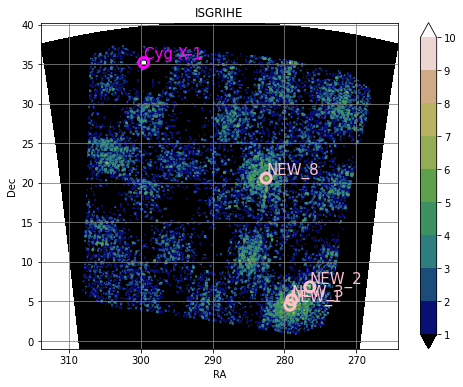

In [50]:
for instrument in 'jemx1', 'jemx2', 'isgri', 'isgrihe':
    p = source_products[instrument + '_image']
    oda_api.plot_tools.OdaImage(p).show(sliders=False) #, header="JEM-X")
    oda_api.plot_tools.OdaImage(p).write_fits(instrument + "_")
    plt.title(instrument.upper())
    plt.savefig(f"figs/{instrument}.png")

    with obs_draft_data as dd:
        try:
            dd[instrument] = {'snr': float(p.dispatcher_catalog_1.table[p.dispatcher_catalog_1.table['src_names'] == "GRB221009A"]['significance'][0])}
        except IndexError:
            print("no GRB here!")
        


/home/savchenk/.local/lib/python3.8/site-packages/oda_api/plot_tools.py:450: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.show()


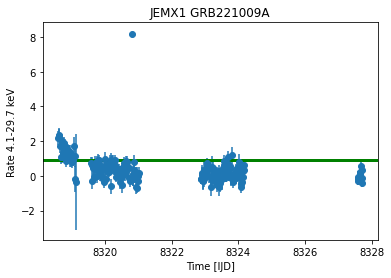

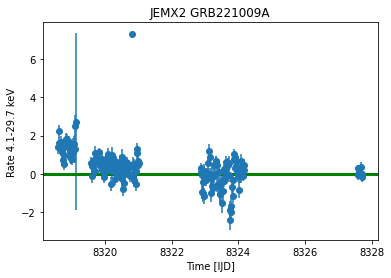

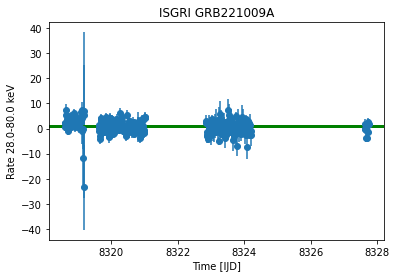

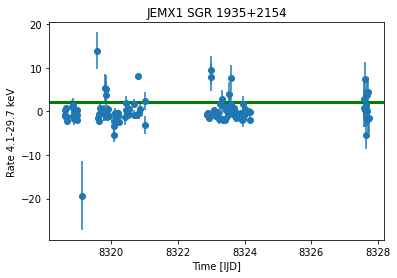

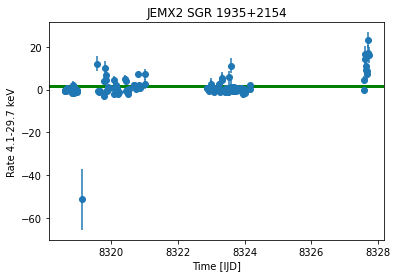

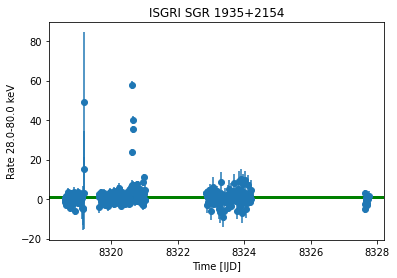

In [51]:
import re

for name in 'GRB221009A', 'SGR 1935+2154':
    name_stub = re.sub("[^0-9a-zA-Z]", "", name).lower()

    for instrument in 'jemx1', 'jemx2', 'isgri':
        oda_api.plot_tools.OdaLightCurve(source_products[instrument + '_lc']).show(in_source_name=name)
        oda_api.plot_tools.OdaLightCurve(source_products[instrument + '_lc']).write_fits(name)
        plt.title(instrument.upper() + " " + name)
        plt.savefig(f"figs/lc_{instrument}_{name_stub}.png")


In [52]:
for instrument in 'jemx1', 'jemx2', 'isgri':
    p = source_products[instrument + '_spectrum']
    oda_api.plot_tools.OdaSpectrum(source_products[instrument + '_spectrum']).write_fits('GRB221009A')
    
    spec = getattr(p, [l['prod_name'] for l in p.as_list() if l['meta_data:']['src_name'] == 'GRB221009A'][0])
    
    with obs_draft_data as dd:
        if instrument not in dd:
            dd[instrument] = {}
        dd[instrument]['exposure_s'] = spec.data_unit[1].header['EXPOSURE']

Saving spectrum ./JMX1_spectrum_GRB221009A.fits with rmf ./JMX1_rmf_GRB221009A.fits and arf ./JMX1_arf_GRB221009A.fits
Saving spectrum ./JMX1_spectrum_GRB221009A.fits with rmf ./JMX1_rmf_GRB221009A.fits and arf ./JMX1_arf_GRB221009A.fits
INFO:oda_api.plot_tools.odaspectrum:Saving spectrum ./JMX1_spectrum_GRB221009A.fits with rmf ./JMX1_rmf_GRB221009A.fits and arf ./JMX1_arf_GRB221009A.fits
Saving spectrum ./JMX2_spectrum_GRB221009A.fits with rmf ./JMX2_rmf_GRB221009A.fits and arf ./JMX2_arf_GRB221009A.fits
Saving spectrum ./JMX2_spectrum_GRB221009A.fits with rmf ./JMX2_rmf_GRB221009A.fits and arf ./JMX2_arf_GRB221009A.fits
INFO:oda_api.plot_tools.odaspectrum:Saving spectrum ./JMX2_spectrum_GRB221009A.fits with rmf ./JMX2_rmf_GRB221009A.fits and arf ./JMX2_arf_GRB221009A.fits
Saving spectrum ./IBIS_spectrum_GRB221009A.fits with rmf ./IBIS_rmf_GRB221009A.fits and arf ./IBIS_arf_GRB221009A.fits
Saving spectrum ./IBIS_spectrum_GRB221009A.fits with rmf ./IBIS_rmf_GRB221009A.fits and arf ./I

In [53]:
with obs_draft_data as dd:
    dd['joint_fit'] = dict(
        e1_keV=3,
        e2_keV=80,
        flux_ecs = 4.4263e-10, # ergs/cm^2/s) range (3.0000 - 80.000 keV
        flux_ecs_err_68p = (4.215e-10 - 4.4263e-10, 4.670e-10 - 4.4263e-10),
        slope = 2.15041,
        slope_err_90p = (-0.0712388,0.0841283)
    )

In [77]:
acslc_r = requests.get(f"https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw//integralhk/api/v1.0/genlc/ACS/{T0_ijd}/20000")
import pandas as pd
import io

acslc = pd.read_csv(io.StringIO(acslc_r.text), skiprows=5, names=['t', 'dt', 'c', 'ds'], delim_whitespace=True)
acslc

,t,dt,c,ds
0,8317.321991,0.022610,5460.0,27750.838610
1,8317.321992,0.072609,5432.0,27750.888609
2,8317.321992,0.122610,5340.0,27750.938610
3,8317.321993,0.172610,5386.0,27750.988610
4,8317.321993,0.222609,5238.0,27751.038609
...,...,...,...,...
799995,8317.784951,39999.799670,5328.0,67750.615673
799996,8317.784952,39999.849670,5276.0,67750.665672
799997,8317.784953,39999.899680,5212.0,67750.715675
799998,8317.784953,39999.949670,5278.0,67750.765675


In [78]:
bkg = np.mean(acslc.c[acslc.t<T0_ijd - 1000./24/3600])


def rebin(x, n):
    N = int(len(x)/n)
    return np.array(x[:N*n]).reshape((N, n)).sum(1)


from scipy.optimize import curve_fit

F = lambda x,a,b,c,d: a+b*x+c*x**2+d*x**3
n = 1000
T = (rebin(acslc.t, n)/n - T0_ijd)*24
m = T < -1
m |= T > 3

curve = curve_fit(
    F,
    T[m],
    (rebin(acslc.c, n)/n - bkg)[m]
    )


curve

(array([-1.45827937e+01, -4.29916314e+00,  2.10266238e-01,  2.92586516e-03]),
 array([[ 1.10826164e-01,  2.08051289e-02, -5.47696719e-03,
         -8.94704751e-04],
        [ 2.08051289e-02,  1.56255518e-02, -9.45498371e-04,
         -6.90606191e-04],
        [-5.47696719e-03, -9.45498371e-04,  3.42733153e-04,
          4.07157718e-05],
        [-8.94704751e-04, -6.90606191e-04,  4.07157718e-05,
          3.37193130e-05]]))

Text(0.5, 0, 'hours since 2022-10-09T13:17:00')

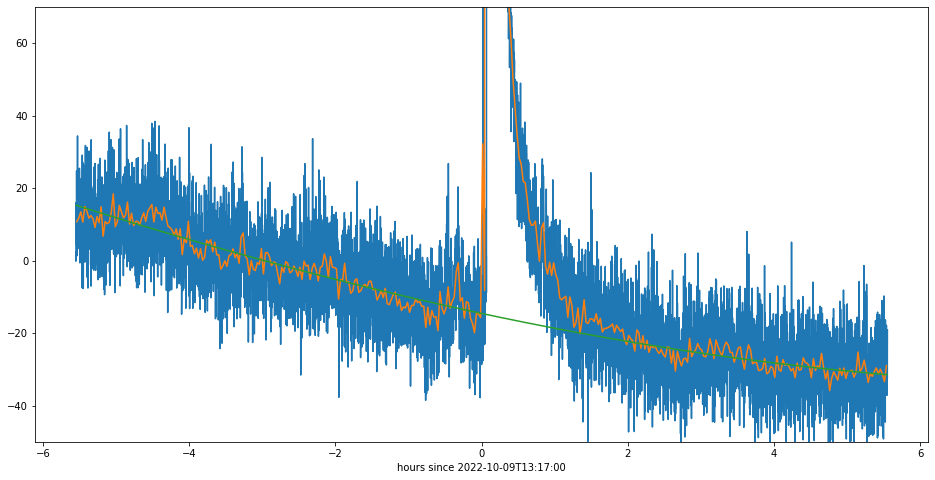

In [79]:
plt.figure(figsize=(16,8))


for n in 100, 2000:

    plt.plot(
        (rebin(acslc.t, n)/n - T0_ijd)*24,
        rebin(acslc.c, n)/n - bkg, # - F((rebin(acslc.t, n)/n - T0_ijd)*24, *curve[0])
    )

# plt.plot(
#     T[m],
#     (rebin(acslc.c, n)/n - bkg)[m]
# )

plt.plot(
    T,
    F(T, *curve[0])
)

plt.ylim([-50,70])

plt.xlabel(f'hours since {T0_isot}')

In [58]:
def rebin_in_bins(t, x, T, agg=np.mean):
    # i =
    X = []
    for _t1, _t2 in zip(T[:-1], T[1:]):
        m = (t > _t1) & (t <= _t2)
        X.append(agg(x[m]))

    return np.array(X)


def rebin_bins_in_bins(t, dt, x, dx, Tb):
    T = []
    dT = []
    X = []
    dX = []    
    for _t1, _t2 in zip(Tb[:-1], Tb[1:]):        
        m = (t > _t1) & (t <= _t2)
        if np.sum(m) > 0:
            T.append((np.max(t[m] + dt[m]) + np.min(t[m] - dt[m]))/2)
            dT.append((np.max(t[m] + dt[m]) - np.min(t[m] - dt[m]))/2)
            X.append(np.sum(x[m]*dt[m])/dT[-1])
            dX.append(
                np.sum((dx[m]*dt[m])**2)**0.5/dT[-1]
                )

    return np.array(T), np.array(dT), np.array(X), np.array(dX)


[]

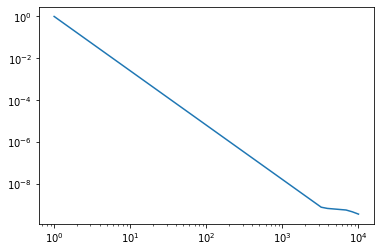

In [59]:
T0bat = Time('2022-10-09 14:10:17')


def xrt_decay(t):
    # #32671
    offset_s = ((T0bat.mjd - 51544) - T0_ijd)*24*3600
    slopes = """Alpha_1 : 2.6 (+0.4, -0.7)
    Tbreak_1: 177.4 (+2.0, -9.6)
    Alpha_2 : 0.144 (+0.022, -0.026)
    Tbreak_2: 610 (+84, -78)
    Alpha_3 : 0.31 (+0.04, -0.03)
    Tbreak_3: 4060 [+0.23, -0.19])
    Alpha_4 : 1.357 (+/-0.010)"""

    slopes =  {s.split(":")[0].strip(): float(s.split(":")[1].split()[0].strip()) for s in slopes.split("\n")}

    for k in slopes:
        if k.startswith('Tbr'):
            slopes[k] += offset_s

    r = t**(-slopes['Alpha_1'])

    m = t > slopes['Tbreak_1'] 
    rn1 = slopes['Tbreak_1']**(-slopes['Alpha_1']) / slopes['Tbreak_1']**(-slopes['Alpha_2'])
    r[m] = t[m]**(-slopes['Alpha_2']) * rn1

    m = t > slopes['Tbreak_2']
    rn2 = slopes['Tbreak_2']**(-slopes['Alpha_2']) / slopes['Tbreak_2']**(-slopes['Alpha_3']) 
    r[m] = t[m]**(-slopes['Alpha_3']) * rn1 * rn2


    m = t > slopes['Tbreak_3']
    rn3 = slopes['Tbreak_3']**(-slopes['Alpha_3']) / slopes['Tbreak_3']**(-slopes['Alpha_4']) 
    r[m] = t[m]**(-slopes['Alpha_4']) * rn1 * rn2 * rn3
    
    return r


t = np.logspace(0,4)

plt.figure()

plt.plot(
    t,
    xrt_decay(t)
)

plt.loglog()


/home/savchenk/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/savchenk/.local/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_112800/3017417018.py:24: RuntimeWarning: invalid value encountered in double_scalars
  rebin_in_bins(d['TIME'] - T0_ijd, d['ERROR'], T, agg=lambda x:(np.sum(x**2))**0.5/len(x)),


(1.0, 2.0)

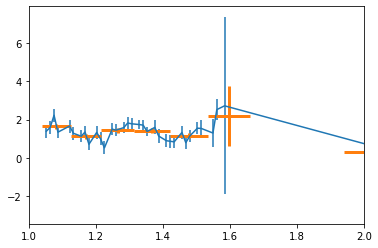

In [60]:
plt.figure()

d_j1 = fits.open("JMX1_lc_GRB221009A.fits")[1].data
d_j2 = fits.open("JMX2_lc_GRB221009A.fits")[1].data
d_i = fits.open("IBIS_lc_GRB221009A.fits")[1].data

d = d_j2
plt.errorbar(d['TIME'] - T0_ijd, d['RATE'],d['ERROR'])

m = d['TIME'] < 8319.5

# plt.errorbar(
#     np.mean(d['TIME'][m]) - T0_ijd, 
#     np.sum(d['RATE'][m])/np.sum(m),
#     (np.sum(d['ERROR'][m]**2)**0.5/np.sum(m)), lw=3)

T = np.logspace(-1, 1, 60)
Tc = (T[1:] + T[:-1])/2.
dT = (T[1:] - T[:-1])/2.

plt.errorbar(
    Tc, 
    rebin_in_bins(d['TIME'] - T0_ijd, d['RATE'], T),
    rebin_in_bins(d['TIME'] - T0_ijd, d['ERROR'], T, agg=lambda x:(np.sum(x**2))**0.5/len(x)),
    xerr=dT,
    ls="",
     lw=3)


plt.xlim([1,2])
# plt.ylim([0,5])

[]

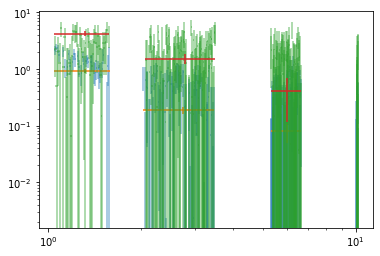

In [61]:

rebinned_lc_by_name = {}


for t, dt, r, re, f, n, T in [
    # (d_j1['TIME'], d_j1['TIMEDEL']/2, (d_j1['RATE'] + d_j2['RATE'])/2, (d_j1['ERROR']**2 + d_j1['ERROR']**2)**0.5/2, 1, 'JEMX1+2', np.logspace(-0.2, 1, 35)),
    # (d_j1['TIME'], d_j1['TIMEDEL']/2, d_j1['RATE'], d_j1['ERROR'], 1, 'JEMX1', np.logspace(-1, 1, 10000)),
    (d_j1['TIME'], d_j1['TIMEDEL']/2, d_j1['RATE'], d_j1['ERROR'], 1, 'JEMX1', np.logspace(-0.1, 1, 4)),
    # (d_j2['TIME'], d_j2['TIMEDEL']/2, d_j2['RATE'], d_j2['ERROR'], 1, 'JEMX2', np.logspace(-0.3, 1, 40)),
    (d_i['TIME'], d_i['TIMEDEL'],d_i['RATE'], d_i['ERROR'], 0.01, 'ISGRI', np.logspace(-0.1, 1, 4)),
]:    
    m = r < 6 # noisy scw?
    m &= re < 4 # noisy scw?
    t = t - T0_ijd

    plt.errorbar(t[m], r[m], re[m], xerr=dt[m], alpha=0.5, ls="")

    Tc, dT, X, dX = rebin_bins_in_bins(t[m], dt[m], r[m], re[m], T)

    
    # plt.errorbar(t, r,re,         # xerr=d['TIMEDEL']/2, 
    #     ls="", label=n, alpha=0.2)

    plt.errorbar(
        Tc,
        X,
        dX,
        # rebin_in_bins(t, re, T, agg=lambda x:(np.sum(x**2))**0.5/len(x)),
        xerr=dT,
        ls="", 
        label=n)

    rebinned_lc_by_name[n] = {
        'Tc': Tc,
        'X': X,
        'dX': dX,
        'dT': dT,
    }


# plt.semilogx()
plt.loglog()
# plt.xlim([5e-1, 12])
# plt.xlim([0.8, 1.5])
# plt.ylim([-5, 10])

# rebin_in_bins(t, r, T, agg=np.mean)

255900310010

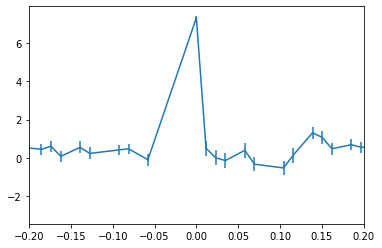

In [62]:
rmax = d_j1[d_j1['RATE'].argmax()]
rmax['TIME']

plt.errorbar(
    d_j2['TIME'] - rmax['TIME'],
    d_j2['RATE'],
    d_j2['ERROR']
)

plt.xlim([-0.2, 0.2])

requests.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/timesystem/api/v1.0/converttime/IJD/{rmax['TIME']}/SCWID").json()

In [63]:
from scipy.interpolate import interp1d
CS = np.cumsum(np.array(acslc.c) - bkg)
interp1d(CS, acslc.t)(np.linspace(0, CS[-1], int(CS[-1]/1000))).shape

(129012,)

In [64]:
from statistics import mode

m = acslc.t > 0

plt.figure(figsize=(8,4))

n = 500
c = plt.errorbar(
        (rebin(acslc.t[m], n)/n - T0_ijd),
        (rebin(acslc.c[m], n)/n - bkg - F((rebin(acslc.t[m], n)/n - T0_ijd)*24, *curve[0]))/acs_scale,
        # (rebin(acslc.c, n)/n - bkg - F((rebin(acslc.t, n)/n - T0_ijd)*24, *curve[0]))
        (rebin(acslc.c[m], n))**0.5/n/acs_scale
    )[0].get_color()

# plt.plot(
#     (acslc.t - T0_ijd)*24*3600,
#     acslc.c,
#     # acslc
# )

plt.xlabel(f"days since {T0_isot}")

# plt.axvspan(Time("2022-10-10 13:27:56").mjd - 51544 - T0_ijd, Time("2022-10-10 14:27:28").mjd - 51544 - T0_ijd, alpha=0.2)
# plt.axvspan(Time("2022-10-10 15:02:00").mjd - 51544 - T0_ijd, Time("2022-10-11 04:19:48").mjd - 51544 - T0_ijd, alpha=0.2)


if True:
    from scipy.optimize import minimize

    # minimize()l
    t_model = lambda t, N, slope: N*t**slope
    slope = -1.3
    t_model_noslope = lambda t, N: N*t**slope_0

    def loss(p):
        if len(p) == 1:
            N, = p
            slope = -1.3
        else:
            N, slope = p
            
        d = np.concatenate([
            (t_model(d_j1['TIME'] - T0_ijd, N, slope) - d_j1['RATE']) / d_j1['ERROR'],
            (t_model(d_j2['TIME'] - T0_ijd, N, slope) - d_j2['RATE']) / d_j2['ERROR']
        ])
        

        m = d**2 < np.percentile(d**2, 95)

        # print(N, slope, (d**2).sum(), d_j1[d.argmax()], d_j1[d.argmin()])
        # plt.plot(d_j1['TIME'], d**2)
        return np.sum(d[m]**2) # + \
            #    np.sum(((t_model(d_j2['TIME'] - T0_ijd, N, slope) - d_j2['RATE']) / d_j2['ERROR'])**2) + \
            #    np.sum(((t_model(d_i['TIME'] - T0_ijd, N, slope) - d_i['RATE']) / d_i['ERROR'])**2)

    slope_fitted = slope
    N_fitted, = minimize(loss, [1]).x
    # N_fitted, slope_fitted = minimize(loss, [N_fitted, slope]).x


    t = np.logspace(-1.5, 1, 100) + 200
    plt.plot(t, t_model(t, N_fitted, slope_fitted), ls="--", label=f'fit to JEM-X and ISGRI light curves, slope={slope_fitted:.3g}, N={N_fitted:.2g}')


xrt_norm = 1e3

# t = np.logspace(np.log10(T0bat.mjd - 51544 - T0_ijd), 1, 100)  
# plt.plot(t, xrt_norm*xrt_decay(t*24*3600)*1e8, label="XRT decay", lw=3, ls="-", c='k', alpha=0.5)

plt.legend()

plt.loglog()

plt.xlim([0, 800])
plt.ylim([1e-2, 3e6])

# plt.xlim([-0., 0.5])
# plt.ylim([-300, 300])


# ax_x_hours = plt.twiny()

# plt.ylabel("erg cm$^{-2}$ s$^{-1}$")
plt.ylabel("counts s$^{-1}$")
plt.savefig("figs/joint_lc.png")
# plt.savefig("grb221009-picture/spiacs-lc.png")

# https://www.swift.ac.uk/burst_analyser/01126853/
# https://gcn.gsfc.nasa.gov/gcn3/32671.gcn3

NameError: name 'acs_scale' is not defined

<Figure size 576x288 with 0 Axes>

/tmp/ipykernel_112800/3118536232.py:162: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("figs/joint_lc.png")
/tmp/ipykernel_112800/3118536232.py:163: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("grb221009-picture/lc.png")
/home/savchenk/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


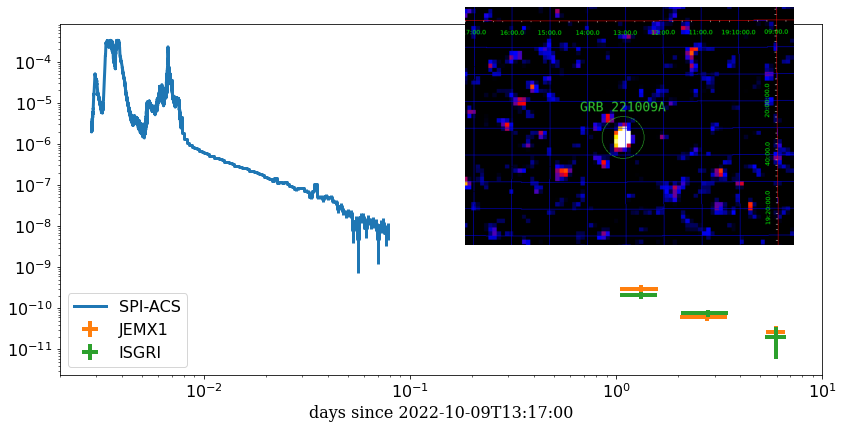

In [128]:
# from statistics import mode

plt.rc('font', size=16) #controls default text size
plt.rc('axes', titlesize=16) #fontsize of the title
plt.rc('axes', labelsize=16) #fontsize of the x and y labels
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
plt.rc('legend', fontsize=16) #fontsize of the legend

d_j1 = source_products['jemx1_lc'].jemx_lc_0_GRB221009A.data_unit[2].data 
d_j2 = source_products['jemx2_lc'].jemx_lc_0_GRB221009A.data_unit[2].data 
d_i = source_products['isgri_lc'].isgri_lc_3_GRB221009A.data_unit[1].data

plt.figure(figsize=(12,6))

tail_change = 670

m = acslc.t  - T0_ijd > 247/24/3600
m &= acslc.t  - T0_ijd < tail_change/24/3600

m_acs_long = acslc.t  - T0_ijd > -200/24/3600
m_acs_long &= acslc.t  - T0_ijd < 0.1

acs_scale = 1/1.5e-10/20

c = plt.plot(
    (acslc.t - T0_ijd)[m],
    (acslc.c - bkg)[m]/acs_scale,
    # alpha=0.2,
    label="SPI-ACS",
    lw=3
)[0].get_color()

# n = 500
# c = plt.errorbar(
#         (rebin(acslc.t[m], n)/n - T0_ijd),
#         (rebin(acslc.c[m], n)/n - bkg - F((rebin(acslc.t[m], n)/n - T0_ijd)*24, *curve[0]))/acs_scale,
#         # (rebin(acslc.c, n)/n - bkg - F((rebin(acslc.t, n)/n - T0_ijd)*24, *curve[0]))
#         (rebin(acslc.c[m], n))**0.5/n/acs_scale
#     )[0].get_color()

tail_change = 0.005
T = np.logspace(np.log10(tail_change), -1.1, 100)
T = np.logspace(np.log10(tail_change), -1.1, 100)

# T = np.concatenate([np.linspace(0, tail_change, int(tail_change/(tail_bins[1] - tail_bins[0]))), tail_bins])

Tc, dT, C, CE = rebin_bins_in_bins(acslc.t - T0_ijd, np.ones_like(acslc.t)*0.05/24/3600/2, acslc.c, acslc.c**0.5, T)

C = C - bkg - F(Tc*24, *curve[0])
# c = 'blue'
c = plt.errorbar(Tc, C/acs_scale, CE/acs_scale, c=c, xerr=dT, ls="", lw=3)[0].get_color()
plt.step(Tc, C/acs_scale, c=c, where='mid', lw=3)



# for d, f, n in [
#     (d_j1, 1, 'JEMX1'),
#     (d_j2, 1, 'JEMX2'),
#     # (d_i, 0.01, 'ISGRI'),
# ]:    
#     plt.errorbar(
#         d['TIME'] - T0_ijd, 
#         f*d['RATE'], 
#         f*d['ERROR'], 
#         xerr=d['TIMEDEL']/2, ls="", label=n)



for n, g in rebinned_lc_by_name.items():
    m = g['X'] / g['dX'] > -10

    if n.lower().startswith('jemx'):
        scale = 0.15/(1e-8/200)
    else:
        scale = 1/(1e-8/200)

    plt.errorbar(
            g['Tc'][m],
            g['X'][m]/scale,
            np.max(np.stack([g['dX'], g['X']*0.2]), axis=0)[m]/scale, # observed jemx systematics included
            xerr=g['dT'][m],
            label=n,
            ls="",
            lw=4.
        )

font = {'fontname':'serif'}

plt.loglog()
plt.xlim([200./24/3600, 3])
plt.xlabel(f"days since {T0_isot}", **font)

# plt.axvspan(Time("2022-10-10 13:27:56").mjd - 51544 - T0_ijd, Time("2022-10-10 14:27:28").mjd - 51544 - T0_ijd, alpha=0.2)
# plt.axvspan(Time("2022-10-10 15:02:00").mjd - 51544 - T0_ijd, Time("2022-10-11 04:19:48").mjd - 51544 - T0_ijd, alpha=0.2)

np.sum(d['TIMEDEL'])*24*3600


if False:
    from scipy.optimize import minimize

    # minimize()l
    t_model = lambda t, N, slope: N*t**slope
    slope = -1.3
    t_model_noslope = lambda t, N: N*t**slope_0

    def loss(p):
        if len(p) == 1:
            N, = p
            slope = -1.3
        else:
            N, slope = p
            
        d = np.concatenate([
            (t_model(d_j1['TIME'] - T0_ijd, N, slope) - d_j1['RATE']) / d_j1['ERROR'],
            (t_model(d_j2['TIME'] - T0_ijd, N, slope) - d_j2['RATE']) / d_j2['ERROR']
        ])
        

        m = d**2 < np.percentile(d**2, 95)

        # print(N, slope, (d**2).sum(), d_j1[d.argmax()], d_j1[d.argmin()])
        # plt.plot(d_j1['TIME'], d**2)
        return np.sum(d[m]**2) # + \
            #    np.sum(((t_model(d_j2['TIME'] - T0_ijd, N, slope) - d_j2['RATE']) / d_j2['ERROR'])**2) + \
            #    np.sum(((t_model(d_i['TIME'] - T0_ijd, N, slope) - d_i['RATE']) / d_i['ERROR'])**2)

    slope_fitted = slope
    N_fitted, = minimize(loss, [1]).x
    # N_fitted, slope_fitted = minimize(loss, [N_fitted, slope]).x


    t = np.logspace(-1.5, 1, 100) + 200
    plt.plot(t, t_model(t, N_fitted, slope_fitted), ls="--", label=f'fit to JEM-X and ISGRI light curves, slope={slope_fitted:.3g}, N={N_fitted:.2g}')


xrt_norm = 1e3

# t = np.logspace(np.log10(T0bat.mjd - 51544 - T0_ijd), 1, 100)  
# plt.plot(t, xrt_norm*xrt_decay(t*24*3600)*1e8, label="XRT decay", lw=3, ls="-", c='k', alpha=0.5)

plt.legend(loc='lower left')

plt.xlim([2e-3, 10])
# plt.ylim([1e-2, 3e6])

# plt.xlim([-0., 0.5])
# plt.ylim([-300, 300])


# ax_x_hours = plt.twiny()

# plt.rcParams["figure.figsize"] = [7.00, 3.50]
# plt.rcParams["figure.autolayout"] = True
im = plt.imread('pom/grb.png') # insert local path of the image.
newax = plt.gcf().add_axes([0.55,0.45,0.9,0.55], anchor='SW', zorder=1)
newax.imshow(im)
newax.axis('off')

plt.ylabel("erg cm$^{-2}$ s$^{-1}$")
plt.savefig("figs/joint_lc.png")
plt.savefig("grb221009-picture/lc.png")

# https://www.swift.ac.uk/burst_analyser/01126853/
# https://gcn.gsfc.nasa.gov/gcn3/32671.gcn3

In [104]:
!ls -lotr pom/grb.png

-rw-rw-r-- 1 savchenk 19218 Okt 25 13:59 pom/grb.png


In [ ]:
from IPython.display import Image

Image('jemx-p3.png')

In [ ]:
with obs_draft_data as dd:
    dd['T0_isot'] = T0_isot
    dd['tstart_isot'] = Time(d_j1['TIME'].min()+51544, format='mjd').isot
    dd['tstart_since_t0'] = d_j1['TIME'].min() - T0_ijd
    dd['tstop_isot'] = Time(d_j1['TIME'].max()+51544, format='mjd').isot
    dd['tstop_since_t0'] = d_j1['TIME'].max() - T0_ijd
    dd['ontime_s'] = np.sum(d_j1['TIMEDEL'])*24*3600

In [ ]:
with obs_draft_data as dd:
    dd['scheduled_obs'] = {
        'T1_isot': '2022-10-11 13:52:21',
        'T2_isot': '2022-10-13 00:58:26'
    }
    dd['scheduled_obs_p3'] = {
        'T1_isot': '2022-10-14 20:42:27',
        'T2_isot': '2022-10-16 04:47:41',
        'ref': 'https://www.cosmos.esa.int/web/integral/schedule-information'
    }

    dd['ixpe_obs'] = {
        'T1_isot': '2022-10-11T23:34:28',
        'T2_isot': '2022-10-14T00:45:31',
        'ref': 'https://www.astronomerstelegram.org/?read=15678' 
    }

In [ ]:
!curl https://www.astro.unige.ch/mmoda/dispatch-data/gw/timesystem/api/v1.0/converttime/UTC/2022-10-09T13:17:00/SCWID

In [ ]:
with DraftData() as dd:
    dd['sc'] = requests.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/scsystem/api/v1.0/sc/{T0_isot}/{src_coord.ra.deg}/{src_coord.dec.deg}").json()

In [ ]:
from astropy.io import fits

# compton_events = fits.open("/mnt/sshfs/cdcihn/isdc/pvphase/nrt/ops/scw/2558/255800290010.000/compton_events.fits.gz")
# compton_events1 = fits.open("/mnt/sshfs/cdcihn/isdc/pvphase/nrt/ops/scw/2558/255800300021.000////compton_events.fits.gz")
# compton_events2 = fits.open("/mnt/sshfs/cdcihn/isdc/pvphase/nrt/ops/scw/2558/255800300010.000///compton_events.fits.gz")


In [ ]:
mce = dict()

for i in range(8):
    mce[i] = pd.read_csv(
        io.StringIO(requests.get(f"https://www.astro.unige.ch/mmoda/dispatch-data/gw/integralhk/api/v1.0/genlc/ISGRIRAW_MCE{i}/{T0_ijd}/2000").text), 
        skiprows=5, names=['t', 'dt', 'c', 'ds'], delim_whitespace=True)


np.sum([mce[i].c for i in range(8)], axis=0)

In [ ]:
# plt.figure(figsize=(16, 6))

# for color, ext in ('g', "COMP-MULE-ALL"), ('r', 'COMP-SGLE-ALL'):
#     label=ext
    
#     for c in compton_events, compton_events1, compton_events2:
#         T = c[ext].data['TIME']
#         E = c[ext].data['ISGRI_ENERGY']

#         plt.hist((T - T0_ijd)*24*3600, bins=1000, alpha=0.3, color=color, label=label)
#         label = None
    
# # for i in range(8):
# plt.plot((mce[0].t- T0_ijd)*24*3600, np.sum([mce[i].c for i in range(8)], axis=0 )/20, label="ISGRI RAW rate")

# plt.legend()
# plt.xlabel(f"seconds since {T0_isot}")
# plt.xlim([0, 1000])

In [ ]:
mce[0].t[:10], mce[2].t[:10]